# Visualization of Network architecture

In [1]:
import torch
import hiddenlayer as hl
from monai.networks.nets.vnet import VNet as MonaiVNet

/home/kahl/anaconda3/envs/uncertainty-modeling/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/kahl/anaconda3/envs/uncertainty-modeling/lib/python3.10/site-packages/torch/onnx/symbolic_helper.py:258: UserWarning: ONNX export failed on feature_dropout because training mode not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")


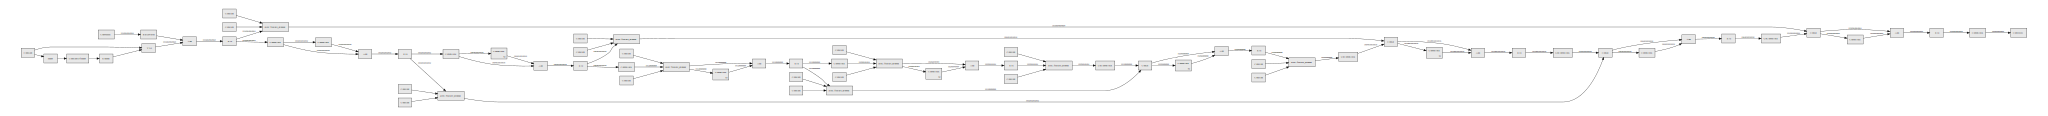

In [2]:
model = MonaiVNet(spatial_dims=3, in_channels=1, out_channels=2, dropout_prob=0.0)

transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Elu", None, name="ConvBlock"),
    hl.transforms.Fold("Conv > BatchNorm > PRelu", None, name="ConvBlock"),
    hl.transforms.Fold("ConvTranspose > BatchNorm > Elu", None, name="UpConvBlock"),
    hl.transforms.Fold("ConvTranspose > BatchNorm > PRelu", None, name="UpConvBlock"),
    hl.transforms.Prune("Unsqueeze"),
    hl.transforms.FoldDuplicates()
]

# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
hl_graph = hl.build_graph(model, torch.zeros([1, 1, 64, 64, 64]), transforms=transforms)
hl_graph